# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


spending score is in the range from 1 to 100 close to 100 means customer spends more and close to 1 means spends less

In [3]:
X = data.iloc[:,[3,4]].values

# Using elbow method to find optimal number of clusters

Text(0, 0.5, 'WCSS value')

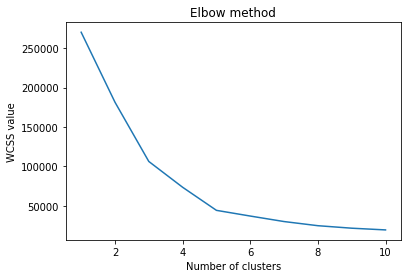

In [4]:
# random initialisation trap can be avoided by using init = 'k-means++'
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init = 'k-means++',random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS value')

Optimal solution at k = 5

# Training the model 

In [5]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [6]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


# Visualisation of clusters


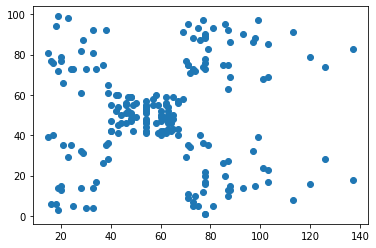

In [8]:
plt.scatter(X[:,0],X[:,1])

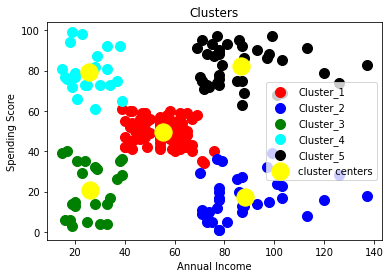

In [12]:
# X contain annual income and spending score
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s = 100,c = 'red',label = 'Cluster_1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s = 100,c = 'blue',label = 'Cluster_2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s = 100,c = 'green',label = 'Cluster_3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s = 100,c = 'cyan',label = 'Cluster_4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s = 100,c = 'black',label = 'Cluster_5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 300,c = 'yellow',label = 'cluster centers')
plt.title('Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()